In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from scipy.signal import find_peaks

In [2]:
data_3=np.loadtxt("G7//spin_echo0,1mM", comments="#", unpack=False, skiprows=1)

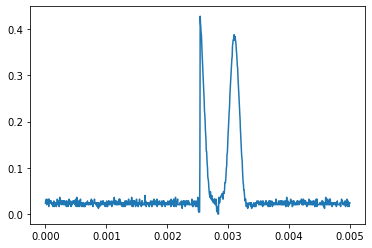

In [3]:
energy=data_3[:, 0]
count=data_3[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

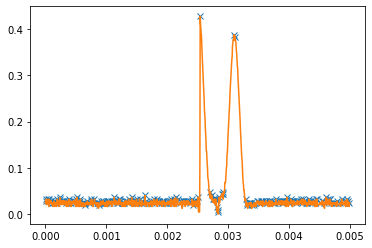

In [4]:
peaks, _ = find_peaks(count) 

plt.plot(energy[peaks], count[peaks], "x")
plt.plot(energy,count,label='recorded data')

In [15]:
print(max(energy[peaks]))
#print(max(peaks))
print(max(count[peaks]))
print(max(peaks))

0.00498
0.428
996


In [13]:
list1 = [10, 20, 4, 45, 99]
list1.sort()
print("Second largest element is:", list1[-2])

Second largest element is: 45


In [17]:
energy[peaks].sort()
print("Second largest element of energy is:", energy[peaks][-2])
count[peaks].sort()
print("Second largest element of count is:", count[peaks][-2])

Second largest element of energy is: 0.004965
Second largest element of count is: 0.028


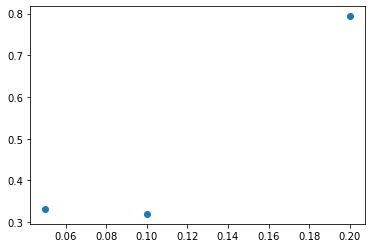

In [55]:
conc=np.array([0.05,0.1,0.2])
#inverse_time=1/x 
t=np.array([3.02,3.13,1.26])
plt.scatter(conc,1/t)

[ 0.16439624  7.1143856  -0.01939832]


C:\Users\localadmin\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, '(1)/ T2(ms)')

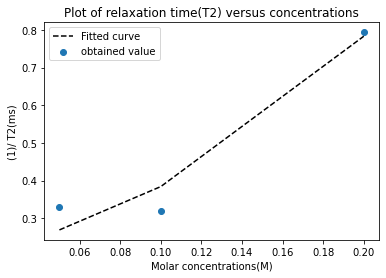

In [86]:
def test(x, a, b,d):
    return a*np.exp(b*(x-d))
 
pars, cov = curve_fit(test, conc, (1/t),p0=[0.8,150,0.3],bounds=(-np.inf, +np.inf), maxfev=10000)
plt.plot(conc, test(conc, *pars), 'k--',label= 'Fitted curve') 
plt.scatter(conc,(1/t),label='obtained value')
print(pars)
plt.legend(loc='best')
plt.title('Plot of relaxation time(T2) versus concentrations')
plt.xlabel('Molar concentrations(M)')
plt.ylabel('(1)/ T2(ms)')



In [72]:
def test(x, a, b,d,c):
    return a*np.exp(-b*(x-d)**2)+c
 
pars, cov = curve_fit(test, conc, (1/t),p0=[0.8,3.7,0.5,0.1],bounds=(-np.inf, +np.inf), maxfev=10000)
plt.plot(conc, test(conc, *pars), 'k--',label= 'Fitted curve') 
plt.scatter(conc,(1/t),label='obtained value')
print(pars)

TypeError: Improper input: N=4 must not exceed M=3

C:\Users\localadmin\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[33.16239971  0.0785091   0.30417247]


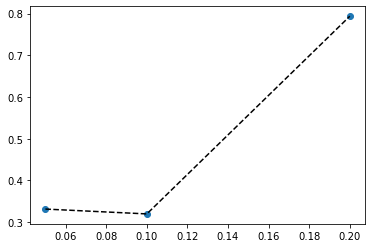

In [73]:
def test(x, a, b,c):
    return a*(x-b)**2+c #a ( x - b )^2 +c a=35.3 



 
pars, cov = curve_fit(test, conc, (1/t),p0=[35.3,0.082,0.3],bounds=(-np.inf, +np.inf), maxfev=10000)
plt.plot(conc, test(conc, *pars), 'k--',label= 'Fitted curve') 
plt.scatter(conc,(1/t),label='obtained value')
print(pars)

In [ ]:
t2=np.array([8.33,12.5])